## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# import libraries needed for the project 

import pandas as pd
import numpy as np


In [2]:
# open the data file

data = pd.read_csv('./data/kc_house_data.csv')


## Data explorations

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

From this first screening, we can see that sqft_basement is an object, so we convert it into float. But when we try to apply the function astype, it gives an error. That's why we have to epxlore the oclumn a little further. By reading the corresponding error of astype and using the function .value_counts() we can see that the problem is that there is the sign "?". 


In [5]:

data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

To proceed with our analysis, we could detete the raws that contain "?", but then we will be losing 454 data points. Consiering that we have 21596 entries, 454 points correspond to a 2.1% of the points. As we want to do the best regression model and consider all the variables, we proceed to delte the values containing "?"

In [6]:
data = data[(data.sqft_basement != '?' )]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     18804 non-null  float64
 9   view           21082 non-null  float64
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  int64  
 12  sqft_above     21143 non-null  int64  
 13  sqft_basement  21143 non-null  object 
 14  yr_built       21143 non-null  int64  
 15  yr_renovated   17389 non-null  float64
 16  zipcode        21143 non-null  int64  
 17  lat            21143 non-null  float64
 18  long  

We can see that now we have 21143 entries 

In [7]:
data['sqft_basement'] = data['sqft_basement'].astype(str).astype(float)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     18804 non-null  float64
 9   view           21082 non-null  float64
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  int64  
 12  sqft_above     21143 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21143 non-null  int64  
 15  yr_renovated   17389 non-null  float64
 16  zipcode        21143 non-null  int64  
 17  lat            21143 non-null  float64
 18  long  

Above we have confirm that the sqft_basement is now a float.
And we also convert the date to a datetime format

In [9]:
#data['date'] = pd.to_datetime(data['date']).head()
#data.info()

To put a bit more of context, would be great to know where the houses are located. So let's explore the postcodes

In [10]:
data['zipcode'].value_counts()

98103    588
98038    574
98115    568
98052    562
98042    542
        ... 
98102    100
98010     98
98024     79
98148     55
98039     49
Name: zipcode, Length: 70, dtype: int64

In [11]:
data.sort_values('zipcode')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17259,2460500020,3/30/2015,305000.0,4,1.75,2370,10140,1.0,0.0,0.0,...,7,1460,910.0,1968,0.0,98001,47.3352,-122.278,1450,7800
11919,3329530030,3/4/2015,271920.0,3,2.00,1410,10248,1.0,NaN,0.0,...,7,1410,0.0,1985,0.0,98001,47.3315,-122.265,2090,9414
1915,3874000240,12/2/2014,210000.0,3,2.00,1440,10111,1.0,0.0,0.0,...,7,1440,0.0,1963,0.0,98001,47.3450,-122.283,1580,10200
14423,8159610150,11/17/2014,234950.0,3,2.00,1510,9153,1.0,0.0,0.0,...,7,1510,0.0,1974,0.0,98001,47.3412,-122.273,1780,9286
14422,2154900330,8/27/2014,234000.0,4,2.50,1820,8217,1.0,0.0,0.0,...,7,1120,700.0,1987,0.0,98001,47.2630,-122.242,1310,8217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11473,207500012,5/5/2014,855000.0,4,2.75,2600,5390,1.0,NaN,0.0,...,8,1300,1300.0,1960,NaN,98199,47.6382,-122.397,2550,5600
1960,1370802650,7/29/2014,605000.0,3,2.00,2660,4500,1.0,0.0,0.0,...,7,1330,1330.0,1922,0.0,98199,47.6391,-122.403,1790,5000
11502,1377800135,4/2/2015,676000.0,3,2.00,1730,6784,2.5,0.0,0.0,...,7,1730,0.0,1942,0.0,98199,47.6462,-122.403,1210,6784
3850,1877500090,2/11/2015,756000.0,3,2.50,3560,8297,1.0,0.0,2.0,...,8,1650,1910.0,1948,0.0,98199,47.6473,-122.407,2760,8297


Exploring the zipcodes, it feels that we are talking about houses in Washington state, usa

## Categorical variables

One of the next steps will be to unesrtand which columns containg categorical values, and for this reason we create a scateter plot against price (which is our variable of interest)

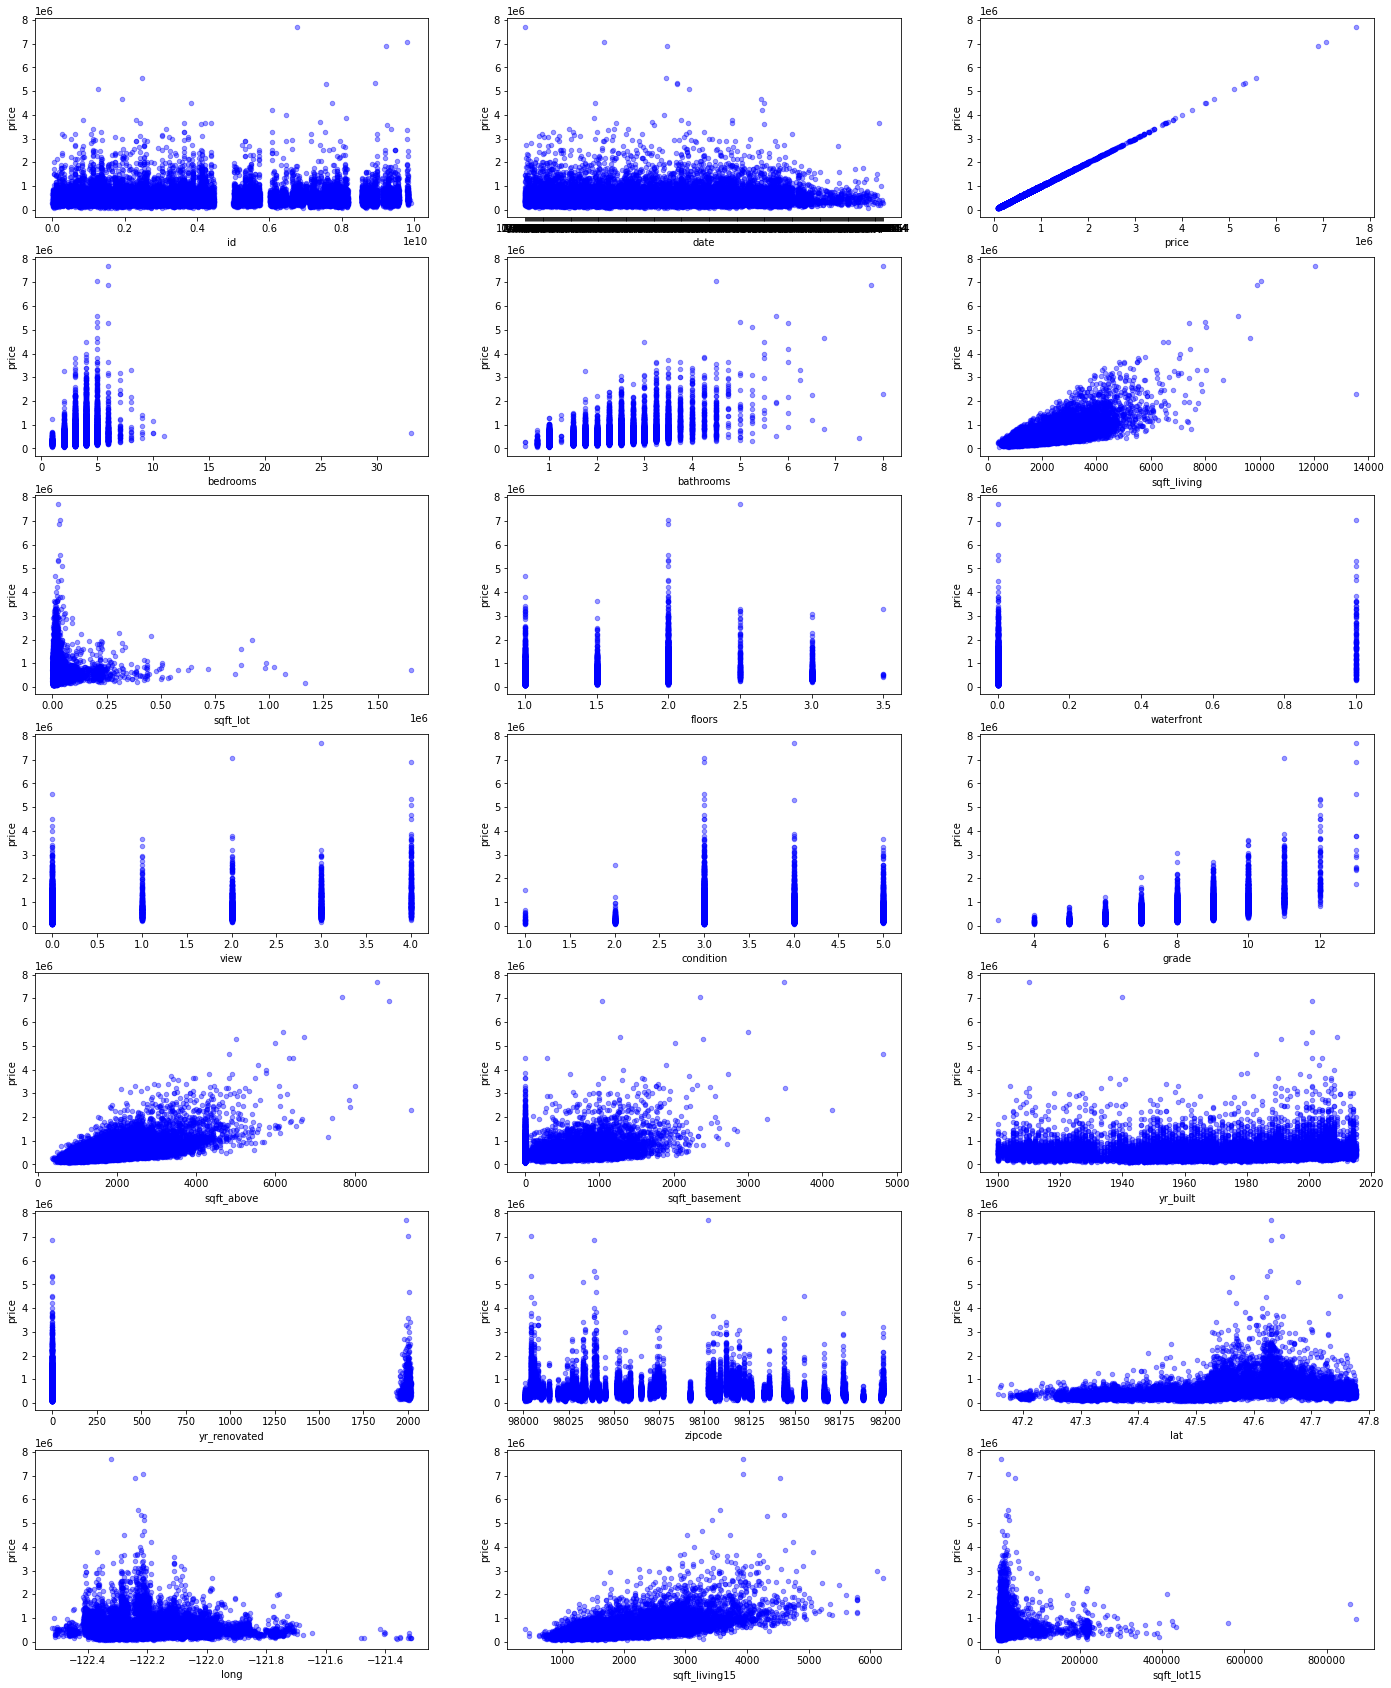

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

 # crate the figure and axes
fig, axes = plt.subplots(7, 3, figsize=(24, 30))   

# unpack all the axes subplots
axe = axes.ravel()

# assign the plot to each subplot in axe
for i, c in enumerate(data.columns):
    
    data.plot(kind='scatter', x=c, y='price', ax=axe[i], alpha=0.4, color='b')

From these graphs and the information enclosed in the document column_names, we can conclude that "Waterfront", "view", "condition", "grade" and "zipcode" are categorical values

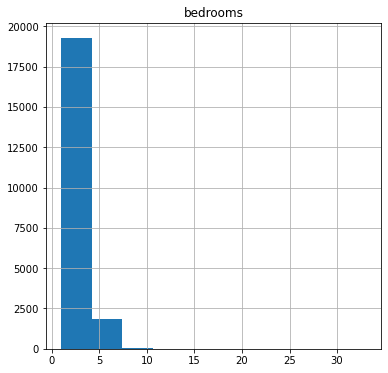

In [13]:
data[['bedrooms']].hist(figsize = [6, 6]);

In [14]:
data.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [15]:
continuous = ['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15' ]
categoricals_temp = ['waterfront', 'view', 'condition', 'grade']

In [16]:
#data_ohe = pd.get_dummies(data[categoricals], prefix=categoricals, drop_first=True)

waterfront_dummies = pd.get_dummies(data['waterfront'], prefix='wf', drop_first=True)
view_dummies = pd.get_dummies(data['view'], prefix='vw', drop_first=True)
condition_dummies = pd.get_dummies(data['condition'], prefix='cd', drop_first=True)
grade_dummies = pd.get_dummies(data['grade'], prefix='grade', drop_first=True)


In [17]:
categoricals = pd.concat([waterfront_dummies, view_dummies, condition_dummies, grade_dummies])

categoricals

,wf_1.0,vw_1.0,vw_2.0,vw_3.0,vw_4.0,cd_2,cd_3,cd_4,cd_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


There are lots of nans, so what I am going to do is delet the values that have NaN. And then run the model. And then if there are some that are not interested, I will delete them so I can have more values
    

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     18804 non-null  float64
 9   view           21082 non-null  float64
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  int64  
 12  sqft_above     21143 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21143 non-null  int64  
 15  yr_renovated   17389 non-null  float64
 16  zipcode        21143 non-null  int64  
 17  lat            21143 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,3,8,1530,0.0,2009,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,3,8,2310,0.0,2014,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,3,7,1020,0.0,2009,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,3,8,1600,0.0,2004,98027,47.5345,-122.069,1410,1287


In [23]:
next_data2 = data.dropna(axis=0)
next_data2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [24]:
waterfront_dummies = pd.get_dummies(next_data2['waterfront'], prefix='wf', drop_first=True)
view_dummies = pd.get_dummies(next_data2['view'], prefix='vw', drop_first=True)
condition_dummies = pd.get_dummies(next_data2['condition'], prefix='cd', drop_first=True)
grade_dummies = pd.get_dummies(next_data2['grade'], prefix='grade', drop_first=True)

categoricals2 = pd.concat([waterfront_dummies, view_dummies, condition_dummies, grade_dummies])

categoricals2


,wf_1.0,vw_1.0,vw_2.0,vw_3.0,vw_4.0,cd_2,cd_3,cd_4,cd_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
data_cont = data[continuous]

In [26]:
data_cont

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1180,0.0,1955,0.0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2170,400.0,1951,1991.0,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,770,0.0,1933,NaN,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1050,910.0,1965,0.0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1680,0.0,1987,0.0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,1530,0.0,2009,0.0,47.6993,-122.346,1530,1509
21593,400000.0,4,2.50,2310,5813,2310,0.0,2014,0.0,47.5107,-122.362,1830,7200
21594,402101.0,2,0.75,1020,1350,1020,0.0,2009,0.0,47.5944,-122.299,1020,2007
21595,400000.0,3,2.50,1600,2388,1600,0.0,2004,0.0,47.5345,-122.069,1410,1287


In [29]:
preprocessed = pd.concat([data_cont, categoricals])
preprocessed

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lat,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,221900.0,3.0,1.00,1180.0,5650.0,1180.0,0.0,1955.0,0.0,47.5112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,538000.0,3.0,2.25,2570.0,7242.0,2170.0,400.0,1951.0,1991.0,47.7210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,180000.0,2.0,1.00,770.0,10000.0,770.0,0.0,1933.0,NaN,47.7379,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,604000.0,4.0,3.00,1960.0,5000.0,1050.0,910.0,1965.0,0.0,47.5208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,510000.0,3.0,2.00,1680.0,8080.0,1680.0,0.0,1987.0,0.0,47.6168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [30]:
X = preprocessed.drop('price', axis=1)
y = preprocessed['price']

In [31]:
import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

MissingDataError: exog contains inf or nans